# Adult Census Income Data Analysis
By Brandon Cabrera


This analysis is based on the Adult Census Income Data 
https://www.kaggle.com/datasets/uciml/adult-census-income/data


# Adult Census Income Data Columns
The Adult Census Income data has 15 columns:
1. age: Age of the individual
2. workclass: Type of employment
3. fnlwgt: Indicates how many people the observation represents from the U.S. population
4. education: Highest level of education the indvidual completed
5. education.num: Numerical representation of education level
6. marital.status: Marital status of the individual
7. occupation: Occupation the individual holds
8. relationship: Relationship within the household
9. race: Race of the individual
10. sex: Biological sex
11. capital.gain: money earned from investments
12. capital.loss: money lost from investments
13. hours.per.week: Average number of hours worked per week
14. native.country: Country of origin
15. income: Indicates whether individual's income is > 50k or <= 50k


# Analysis Questions
Throughout this analysis I will try to answer the following questions:
1. What was the average number of hours worked for a person who
made > $50k, and what was the average number of hours worked
for a person who made <= to 50k?
2. For a person whose highest education level is only high school, who
makes > $50k, if any, what is the average number of hours worked?
3. What is the average education level for a person making > $50k,
and what is the average education level for a person making <= $50k?
4. What is the correlation between capital gain and whether or not a
person makes over $50k?
5. What marital status has the most people making over $50k, and what
marital status has the most people making less than or equal to $50k?
6. What numerical column has the highest amount of correlation, in
terms of magnitude, with wether or not a person made > $50k and whether they make <= to $50k?
7. What workclass has the most people making <= $50k, and what work
class has the most people making > $50k?
8. Do women or men tend to make > $50k more than the other, and do
women or men tend to make <= $50k
9. What is the average age of men who make > 50k, and what is the
average age of women who make > 50k
10. Which race tends to make > 50k, more than the other races, and
what race tends to make <= 50k more than the other races


# Importing Required Libraries

Before we start loading the data we need to import important libraries

In [1]:
print("Done By Brandon Cabrera")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() 

Done By Brandon Cabrera


# Importing Dataset
All of our data is contained within one dataset so let's load it and save it as a DataFrame

In [2]:
print("Done By Brandon Cabrera")
adult_census_data = pd.read_csv('data/adult_census_income.csv') #load the csv file into DataFrame
adult_census_data.head() # Display the first 5 rows of the dataset

Done By Brandon Cabrera


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's get some info about the columns of the dataset including how many non-null values they have and what each respective column's data type is.

In [3]:
print("Done By Brandon Cabrera")
adult_census_data.info() #display the columns, non-null count, and data type


Done By Brandon Cabrera
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Cleaning and preparing dataset

Before starting to explore the dataset more in detail let's make sure the dataset is clean so let's check to see if there is any null values.

In [4]:
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)
print("Done By Brandon Cabrera")

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Done By Brandon Cabrera


It appears there isn't an null values at first glace. However the dataset does contain '?' in some columns , e.g. row 0 of the workclass column contains a '?'. A question mark is a bit ambigious so for the sake of less ambiguity let's replace the question marks for NaN. So now the data set does have null values which be dealt with later on 

In [5]:
print("Done By Brandon Cabrera")
adult_census_data.replace('?', np.nan, inplace=True) # every '?' value will be replaced for NaN
adult_census_data.head(10) # display first 10 rows

Done By Brandon Cabrera


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [6]:
print("Done By Brandon Cabrera")
adult_census_data.tail(10) # display the last 10 rows

Done By Brandon Cabrera


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Let's see how many null values we have now after replacing the '?' values.

In [7]:
print("Done By Brandon Cabrera")
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)

Done By Brandon Cabrera
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Notice that the missing values are only for qualtative features and that all of the numeric features don't have any missing values. This sheds some light on why originally there was '?' values for these columns instead of NaN because it's a qualtative column, NaN isn't the most appropiate placeholder. For a better understanding of how many null values let's have a look at the percentage of null values there is.

In [8]:
print("Done By Brandon Cabrera")
print(((adult_census_data.isnull().sum() / len(adult_census_data)) * 100).round(2)) # divide null values by total number of values in column and round to two decimals

Done By Brandon Cabrera
age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


The highest percentages is in the occupation column meaning 5.66 % of the values in the feature are null values. The percentage isn't that high so we can get rid of the rows with null values without worrying about losing too much data.

In [9]:
print("Done By Brandon Cabrera")
adult_census_data.dropna(inplace = True)
adult_census_data.count()

Done By Brandon Cabrera


age               30162
workclass         30162
fnlwgt            30162
education         30162
education.num     30162
marital.status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital.gain      30162
capital.loss      30162
hours.per.week    30162
native.country    30162
income            30162
dtype: int64

The null values in the dataset have been removed. I now want add two binary columns using the 'income' column. One column will represent if the the individual makes over $50k and the other column will represent if the individiual makes less than or equal to $50k.

In [101]:
print("Done By Brandon Cabrera")
def add_income_binary_columns(df:pd.DataFrame) -> pd.DataFrame:
  """Adds two binary columns based on the income column to DataFrame passed as argument. One column represents if the indiviual makes
  > $50k and the other column represents whether the individual makes <= 50k.

  Args:
      df (DataFrame): DataFrame to add columns to

  Returns:
      DataFrame: Returns a DataFrame with the orignal columns and two new binary columns
  """

  df['binary_income_over_$50k']  = (adult_census_data['income'] == '>50K').astype(int) # 1 for over 50k and 0 for <= 50k
  df['binary_income_equal_under_$50k'] = (adult_census_data['income'] == '<=50K').astype(int) # 1 for <= 50k and 0 for > 50k
  return df

Done By Brandon Cabrera


Let's add the columns and then confirm that the two new columns were added.

In [102]:
print("Done By Brandon Cabrera")
adult_census_data = add_income_binary_columns(adult_census_data)
adult_census_data[['binary_income_over_$50k', 'binary_income_equal_under_$50k']].head(10) # display first 10 rows

Done By Brandon Cabrera


,binary_income_over_$50k,binary_income_equal_under_$50k
1,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,0,1
10,1,0
11,1,0
12,1,0


We are going to drop 'fnlwgt' column since it doesn't provide us any useful information to help answer our questions

In [10]:
print("Done By Brandon Cabrera")
adult_census_data.drop('fnlwgt', inplace = True, axis = 1)

Done By Brandon Cabrera


In [11]:
print("Done By Brandon Cabrera")
adult_census_data.head()

Done By Brandon Cabrera


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# Exploratory Data Analysis(EDA)

The exploration can be split up into two categories: numerical columns and qualtative columns. Our goal here is to get some graphs that help answer our analysis questions.

## Exploring numerical columns 
We're going to do some boxplots for our numerical columns as the y-values for our boxplots and then for our x-values we'll do one of the binary income columns. It doesn't matter whether we choose 'binary_income_under_$50k' or 'binary_income_over_$50k' since we'll still get the same information, the graphs would just be mirrored versions of each other.

In [105]:
adult_census_data.select_dtypes(include='number').columns # show all of our numeric columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'binary_income_over_$50k',
       'binary_income_equal_under_$50k'],
      dtype='object')

In [106]:
print("Done By Brandon Cabrera")
def plot_boxplot(x:str, y:str) -> pd.DataFrame: 
  """Plots a boxplot and returns a DataFrame containing descriptive stats shown by the boxplot

  Args:
      x (String): A column name from adult_census_data
      y (String)): A column name from adult_census_data

  Returns:
      DataFrame: Contains descriptive stats of what's shown on the boxplot
  """
  fig = plt.figure(figsize=(12,12))
  fig = sns.boxplot(data = adult_census_data, x = adult_census_data[x], y = adult_census_data[y], hue = adult_census_data['income'],)
  plt.show()
  group_0 = adult_census_data[adult_census_data['binary_income_over_$50k'] == 0][y]
  group_1 = adult_census_data[adult_census_data['binary_income_over_$50k'] == 1][y]
  group_combined = pd.DataFrame({'Income <= 50k(0)' : group_0.describe(), 'Income > 50k(1)': group_1.describe()})
  return group_combined

Done By Brandon Cabrera


Done By Brandon Cabrera


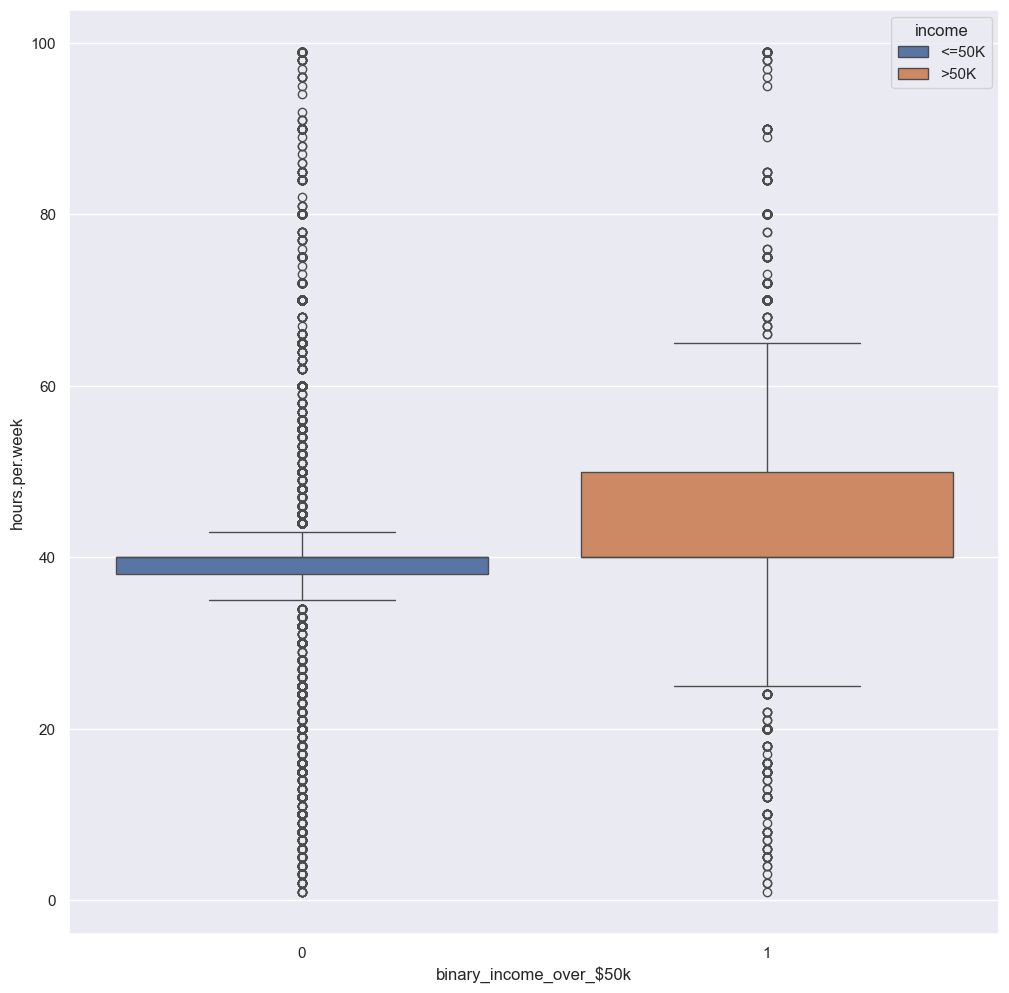

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,39.348592,45.706580
std,11.950774,10.736987
min,1.000000,1.000000
25%,38.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


In [107]:
print("Done By Brandon Cabrera")
hours_per_week_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'hours.per.week')
hours_per_week_info

From the above boxplot it's clear that people who made over 50k had a higher average number of hours worked per week with 45.7 hours worked. Their standard deviation are similar with a differnce of around 1.22 hours worked. The quartiles for two groups are close in value aswell. This answers analysis question #1.

Done By Brandon Cabrera


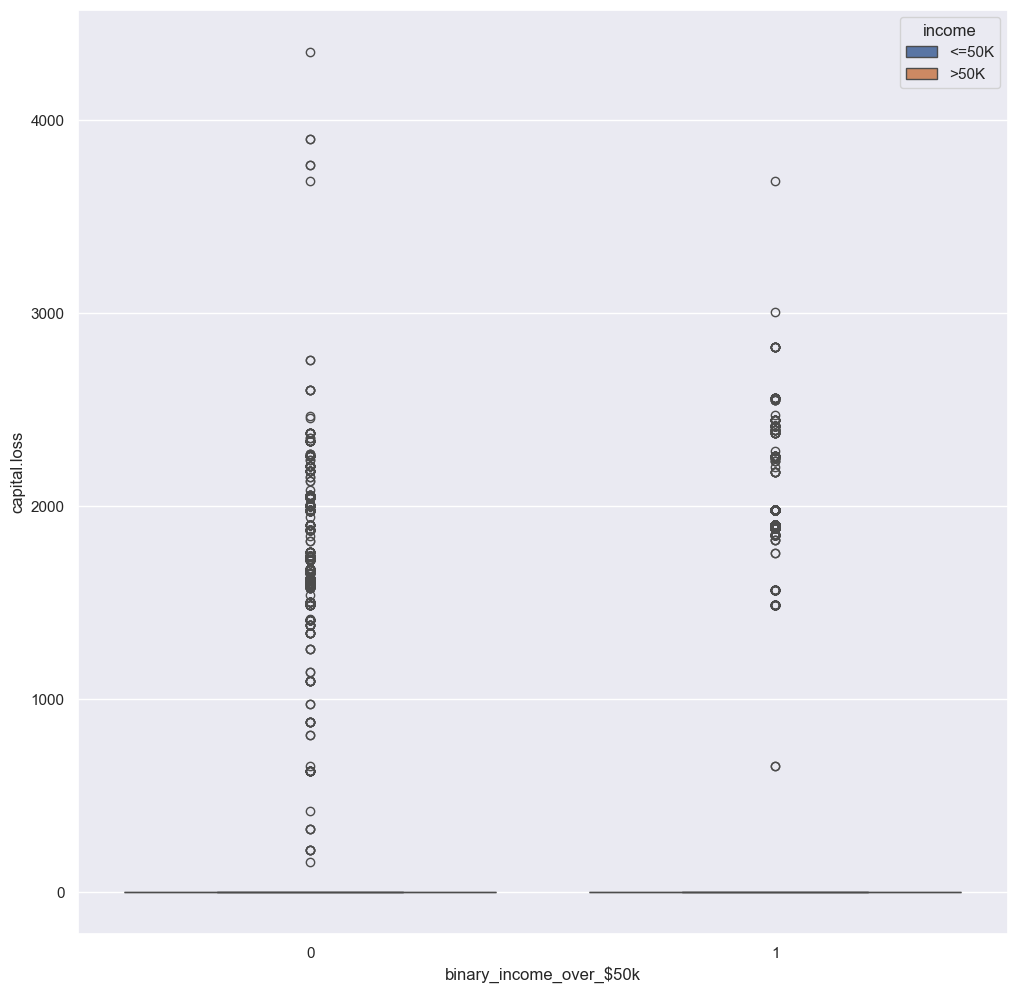

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,53.448000,193.750666
std,310.270263,592.825590
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


In [108]:
print("Done By Brandon Cabrera")
capital_loss_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'capital.loss')
capital_loss_info

The quartiles of the boxplot are hard to see since it's been squished to the bottom of the graph. From the descriptive stats, people who make over $50k have a mean of $193.75 capital loss, so they actually lose more from investments than people who make under $50k with a mean of $53.44 capital loss. The max value for people who make <= $50k actually is higher than those who do make > $50k with values of $4356.0 and $3683.0, respectively.

Done By Brandon Cabrera


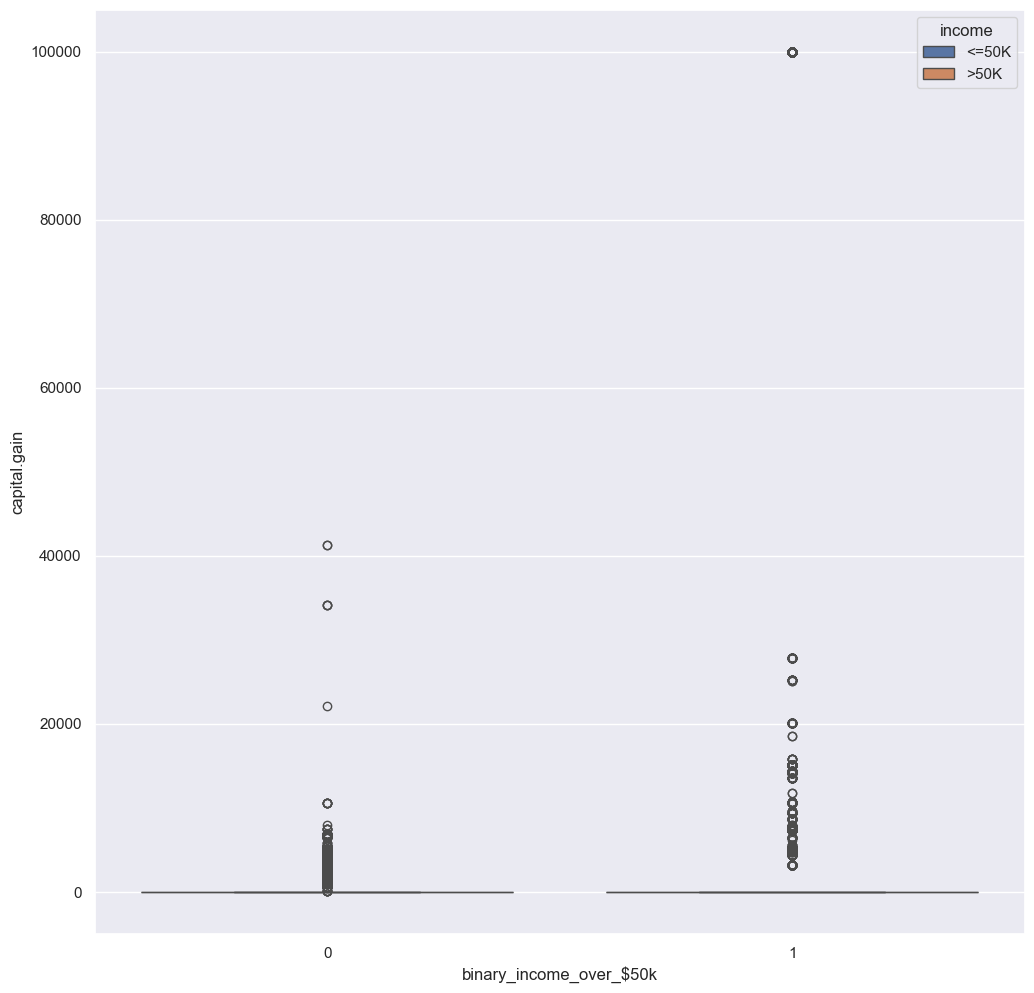

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,148.893838,3937.679808
std,936.392280,14386.060019
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


In [109]:
print("Done By Brandon Cabrera")
capital_gain_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'capital.gain')
capital_gain_info

Once again the quartiles for the boxplot have been squished to the bottom of the graph. The descriptive stats shows that for the people who make > $50k they have a mean of $3937.67 capital gain while the people who make <= $50k have a mean of $148.89 capital gain. That is a sizeable difference between the two. The max value of capital gain is $41310.0 for people who make < $50k and then for people who make > $50k it's $99999.0

Done By Brandon Cabrera


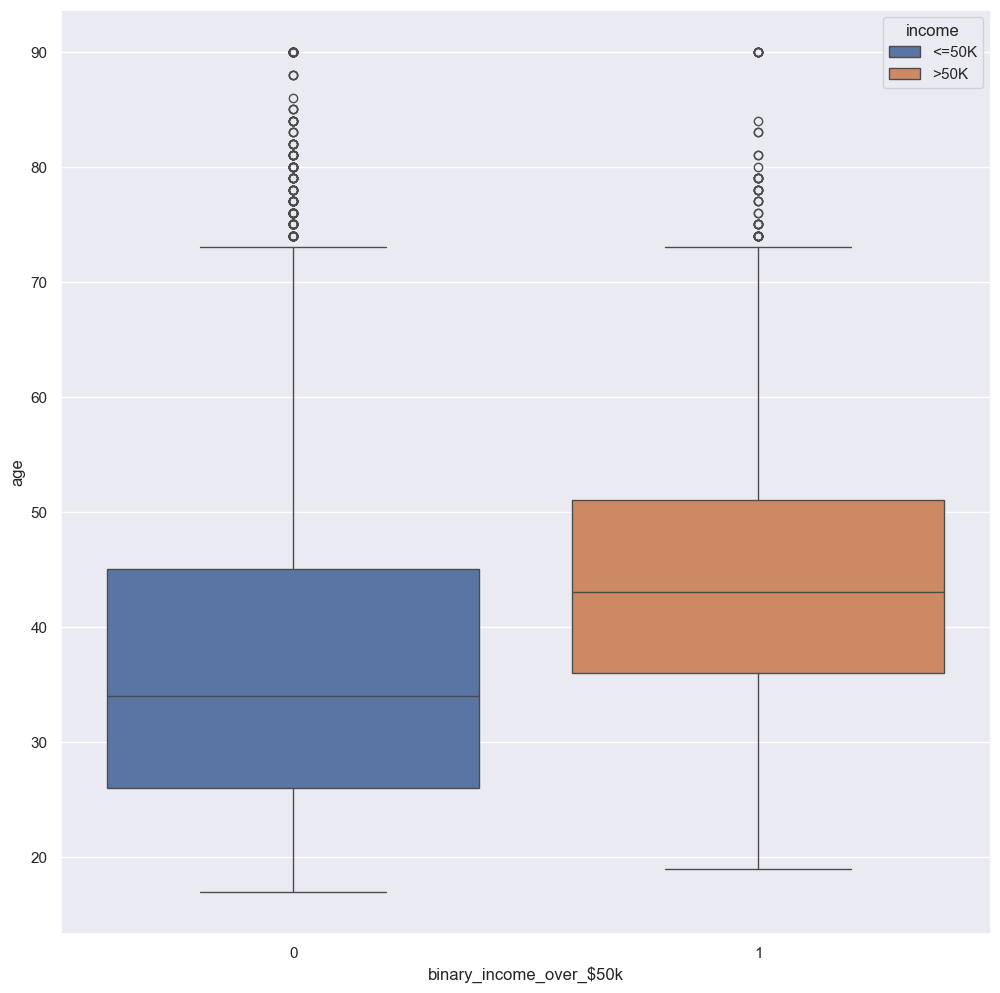

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,36.608060,43.959110
std,13.464631,10.269633
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,45.000000,51.000000
max,90.000000,90.000000


In [110]:
print("Done By Brandon Cabrera")
age_group_info = plot_boxplot(x = 'binary_income_over_$50k', y='age')
age_group_info


From the above figure and the statistics, the mean age of people who make > $50k is higher than the mean age of people who make <= $50k. With values of 43.95 years old and 36.60 years old respectively.

Done By Brandon Cabrera


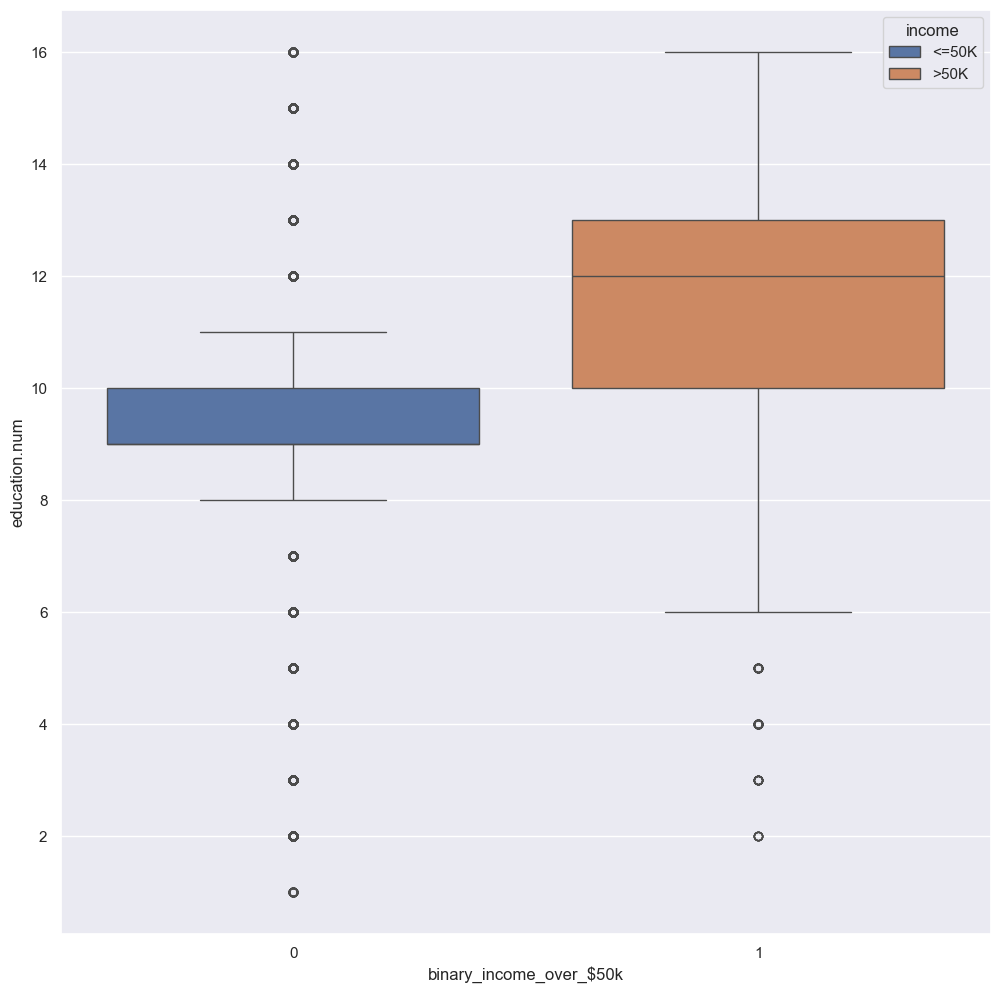

,Income <= 50k(0),Income > 50k(1)
count,22654.000000,7508.000000
mean,9.629116,11.606420
std,2.413596,2.368423
min,1.000000,2.000000
25%,9.000000,10.000000
50%,9.000000,12.000000
75%,10.000000,13.000000
max,16.000000,16.000000


In [111]:
print("Done By Brandon Cabrera")
education_num_info = plot_boxplot(x = 'binary_income_over_$50k', y = 'education.num')
education_num_info

The above information tells us that the average education number for people who make > $50k is 12 if we round up to the nearest number, which is equivalent to Assoc-acdm in terms of education level. Then for the people who make <= 50k, rounding up to the nearest whole number, the average education number is 10, meaning they have some-college. This answers analysis question #3, the average education level for both groups is now known.

### Numerical Columns Correlations 

Next let's see how correlated the numerical columns are to each binary column.

In [112]:
print("Done By Brandon Cabrera")
adult_census_data.corr(numeric_only= True)[['binary_income_over_$50k', 'binary_income_equal_under_$50k']]

Done By Brandon Cabrera


,binary_income_over_$50k,binary_income_equal_under_$50k
age,0.241998,-0.241998
education.num,0.335286,-0.335286
capital.gain,0.221196,-0.221196
capital.loss,0.150053,-0.150053
hours.per.week,0.229480,-0.229480
binary_income_over_$50k,1.000000,-1.000000
binary_income_equal_under_$50k,-1.000000,1.000000


From the correlation matrix analysis question #4 and analysis question #6 can be answered. The correlation between capital gain and a person making over > 50k is a 0.221 indicating a weak positive relationship. This makes sense since not everyone who is making money from investments might be making a profit compared to their losses or the money made isn't much. The column with the highest amount of correlation, in terms of magnitude, for both binary columns is education.num with a value of 0.335. This is weak relationship indicating that as a person's education level becomes higher they are more likely to make >$50k. If we look at it from the perspective of making <= $50k, then it indicates that as a person's education level becomes higher than they are less likely to make <= $50k. Capital loss has the least amount of correlation with both of the income groups.

## Exploring qualtative columns

For visualizing the qualtative colums let's use bar chart to help answer the analysis questions. Let's get a list of the qualtative columns.

In [113]:
adult_census_data.select_dtypes(include = 'object').columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [114]:

def plot_countplot(col: str, figsize = (15,15)) -> pd.DataFrame:
  """Creates a countplot and returns a frequency table that represents the countplot

  Args:
      col (str): A column name from adult_census_data

  Returns:
      pd.DataFrame: Frequency table that represents the countplot that is made
  """
  fig = plt.figure(figsize = figsize)
  fig = sns.countplot(x=adult_census_data[col], hue = adult_census_data['income'])
  plt.show()
  return pd.crosstab(index= adult_census_data[col], columns = adult_census_data['binary_income_over_$50k']) #creates a frequency table


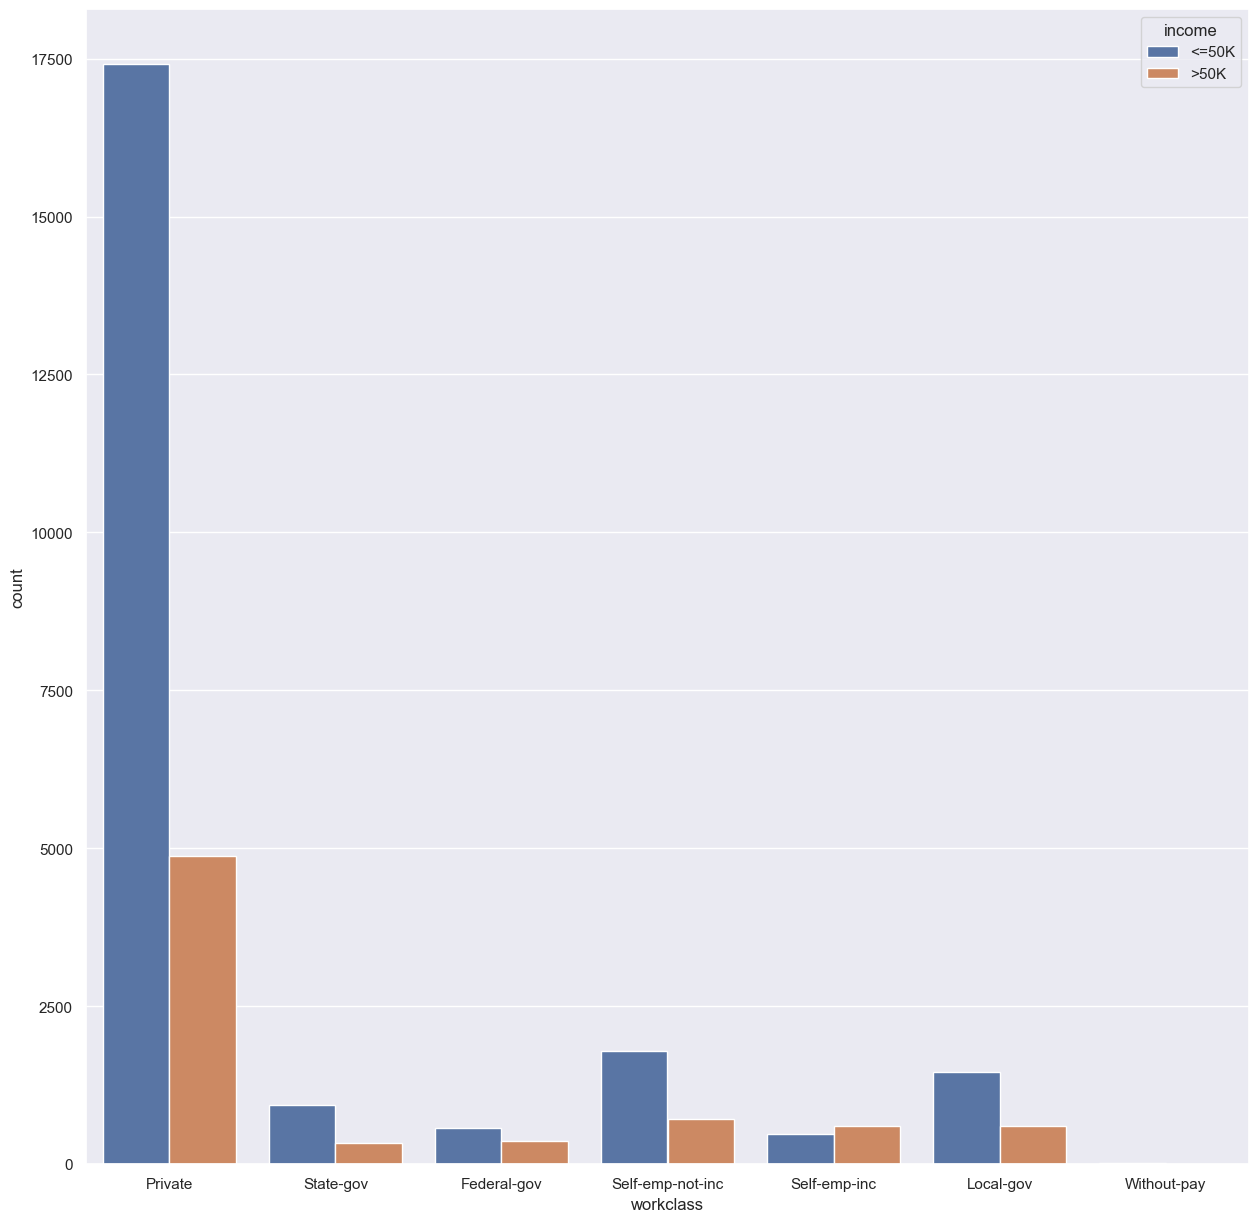

binary_income_over_$50k,0,1
workclass,,
Private,17410,4876
Self-emp-not-inc,1785,714
Local-gov,1458,609
State-gov,935,344
Federal-gov,578,365
Self-emp-inc,474,600
Without-pay,14,0


In [115]:
workclass_countplot_table = plot_countplot('workclass')
workclass_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

The above figure shows that private workclass has the most amount of people making > $50k, as well as the most amount of people making less <= 50k. There is 4876 people who make > $50K and who are apart of the private workclass. This answers analysis question #7. A trend for the data is that <= $50k income group has more people in it than the > $50k income group for every workclass, except for the self-emp-inc workclass.

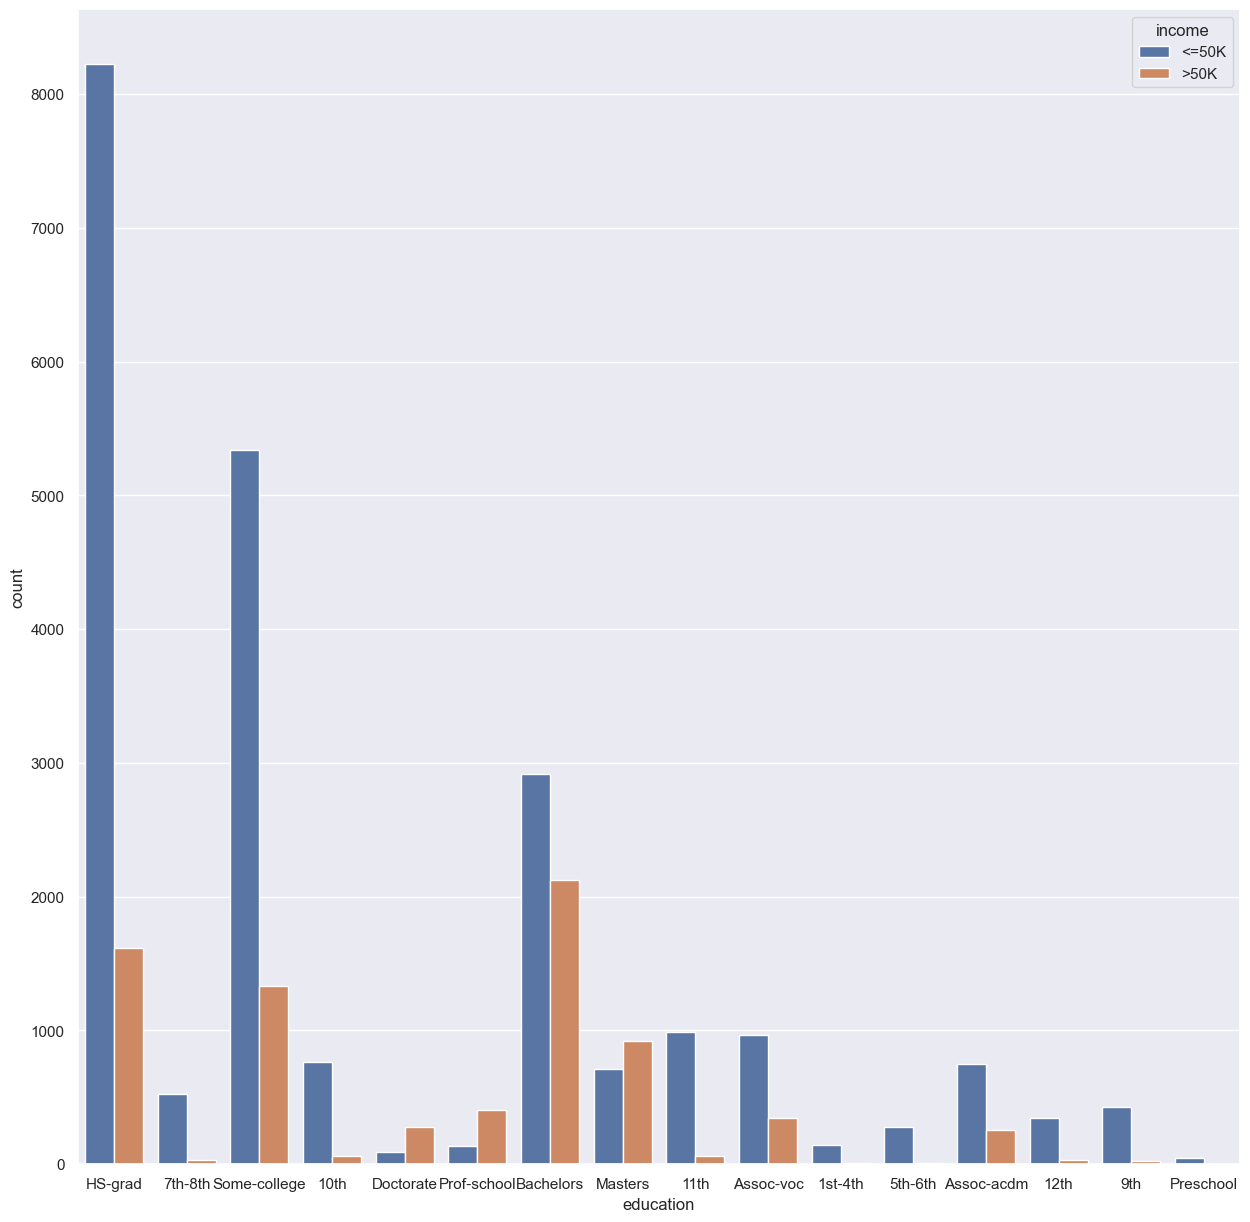

binary_income_over_$50k,0,1
education,,
HS-grad,8223,1617
Some-college,5342,1336
Bachelors,2918,2126
11th,989,59
Assoc-voc,963,344
10th,761,59
Assoc-acdm,752,256
Masters,709,918
7th-8th,522,35


In [116]:
education_countplot_table = plot_countplot('education')
education_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

It's clear that education level with the most amount of people who are making <= $50k is the HS-grad education level, from the above figure. We can also see that for post-graduate education levels, there is more people who make over >$50k than there is people who make <= $50k. We can see the opposite effect for people who's highest education level is a Bachelor's degree and lower.

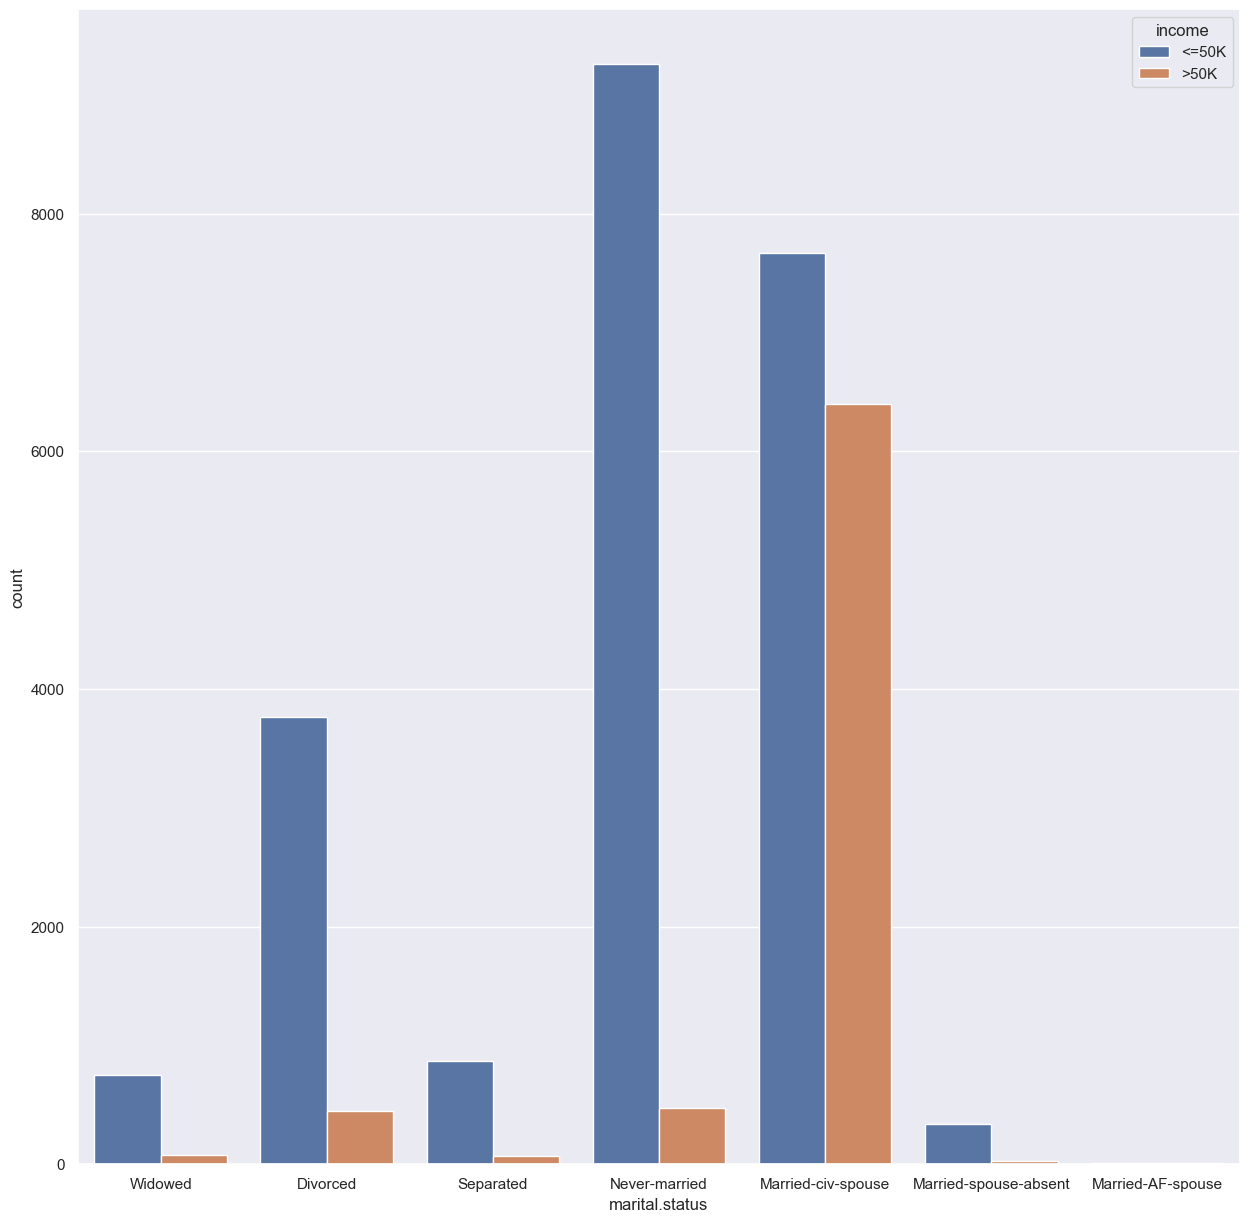

binary_income_over_$50k,0,1
marital.status,,
Never-married,9256,470
Married-civ-spouse,7666,6399
Divorced,3762,452
Separated,873,66
Widowed,747,80
Married-spouse-absent,339,31
Married-AF-spouse,11,10


In [117]:
marital_status_countplot_table = plot_countplot('marital.status')
marital_status_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

From the above figure analysis question #5 can be answered. The marital status with the most amount of people making > $50k is married-civ-spouse. The marital status with the most amount of people making <= 50k is Never-married.

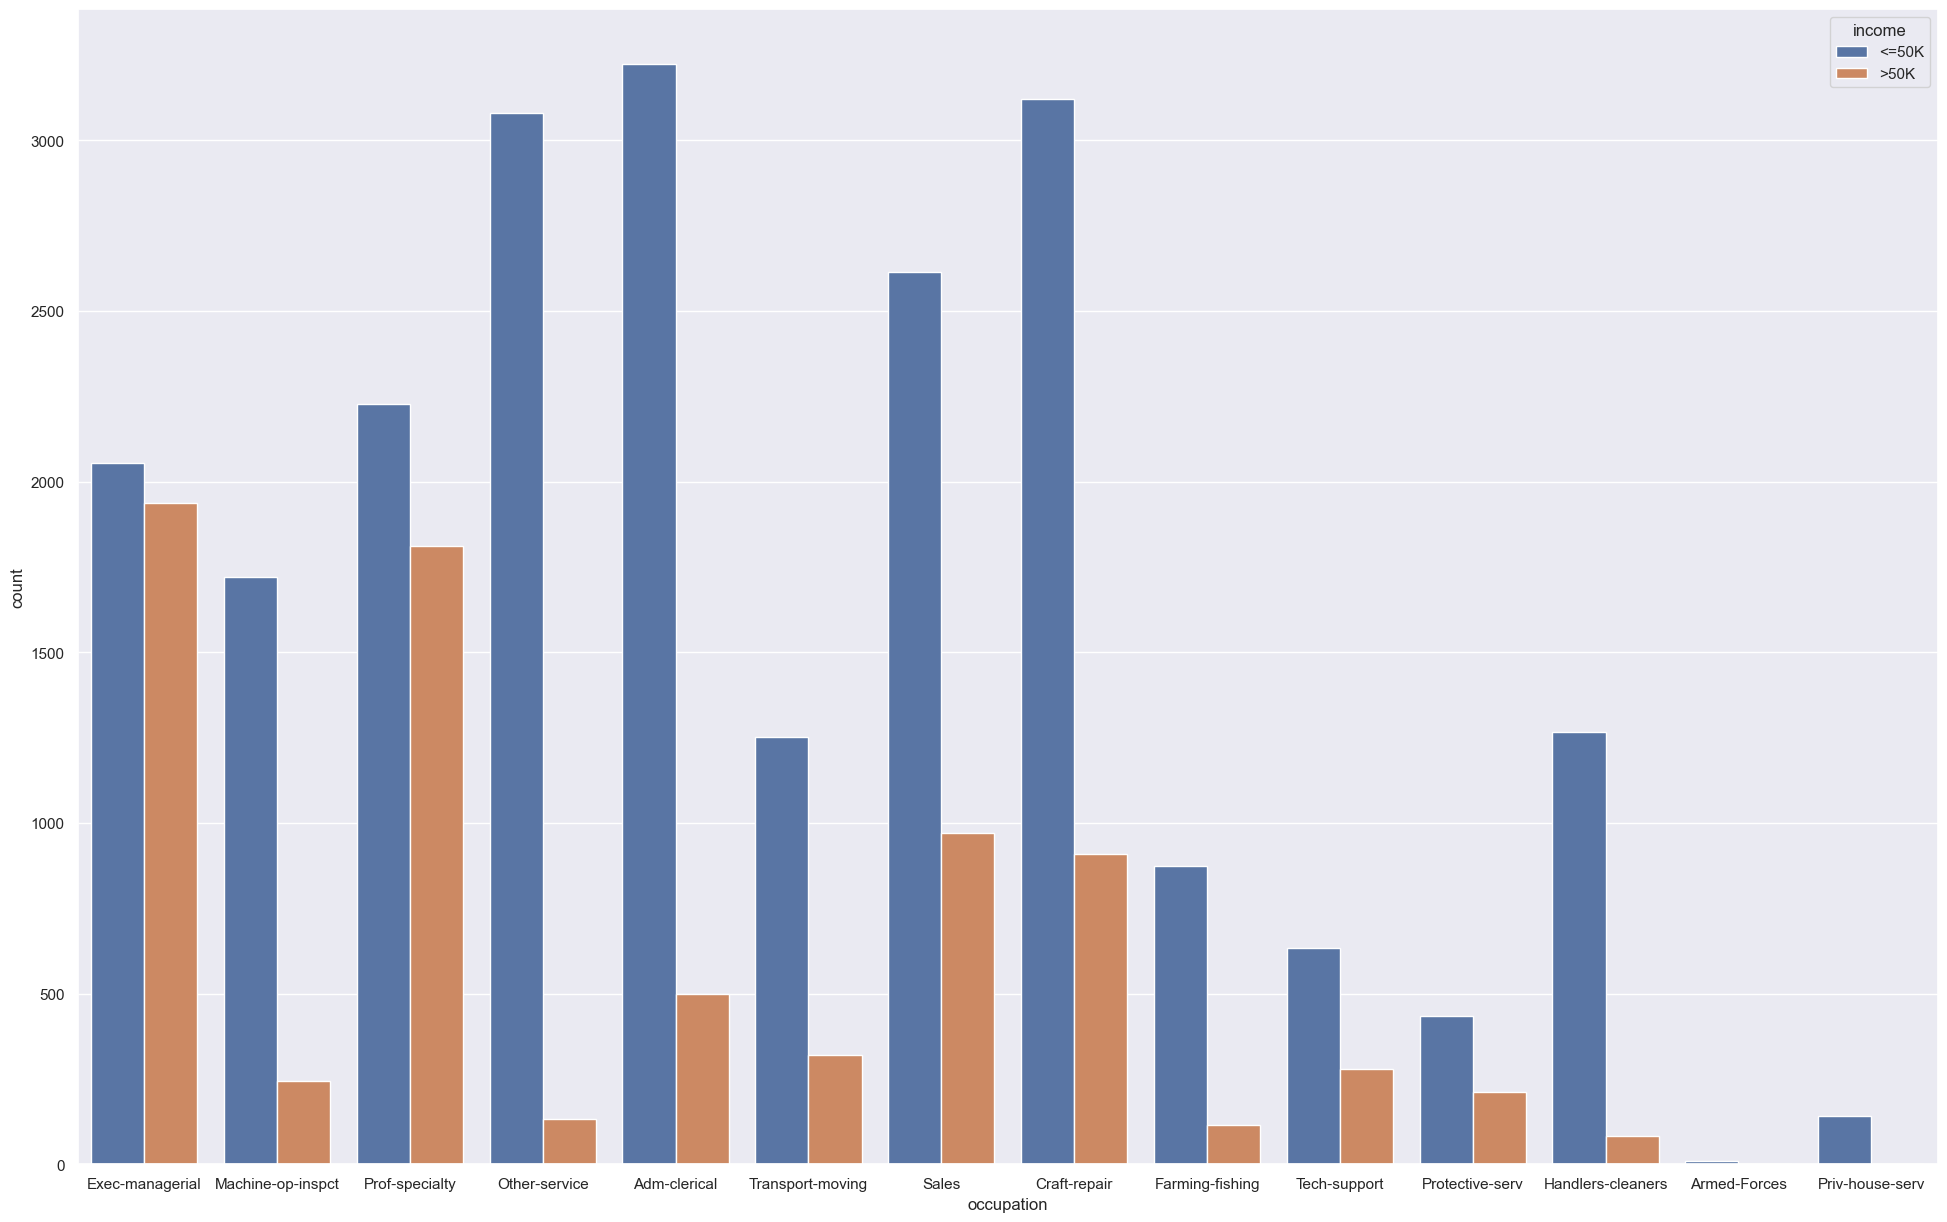

binary_income_over_$50k,0,1
occupation,,
Adm-clerical,3223,498
Craft-repair,3122,908
Other-service,3080,132
Sales,2614,970
Prof-specialty,2227,1811
Exec-managerial,2055,1937
Machine-op-inspct,1721,245
Handlers-cleaners,1267,83
Transport-moving,1253,319


In [118]:
occupation_countplot_table = plot_countplot('occupation', figsize= (24,15))
occupation_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

From the above figure it's evident most of the occupations have a considerable amount of more people making <= $50k than people making >= 50k. Except for the occupations, Prof-specialty and Exec-managerial, where the difference is a lot smaller.

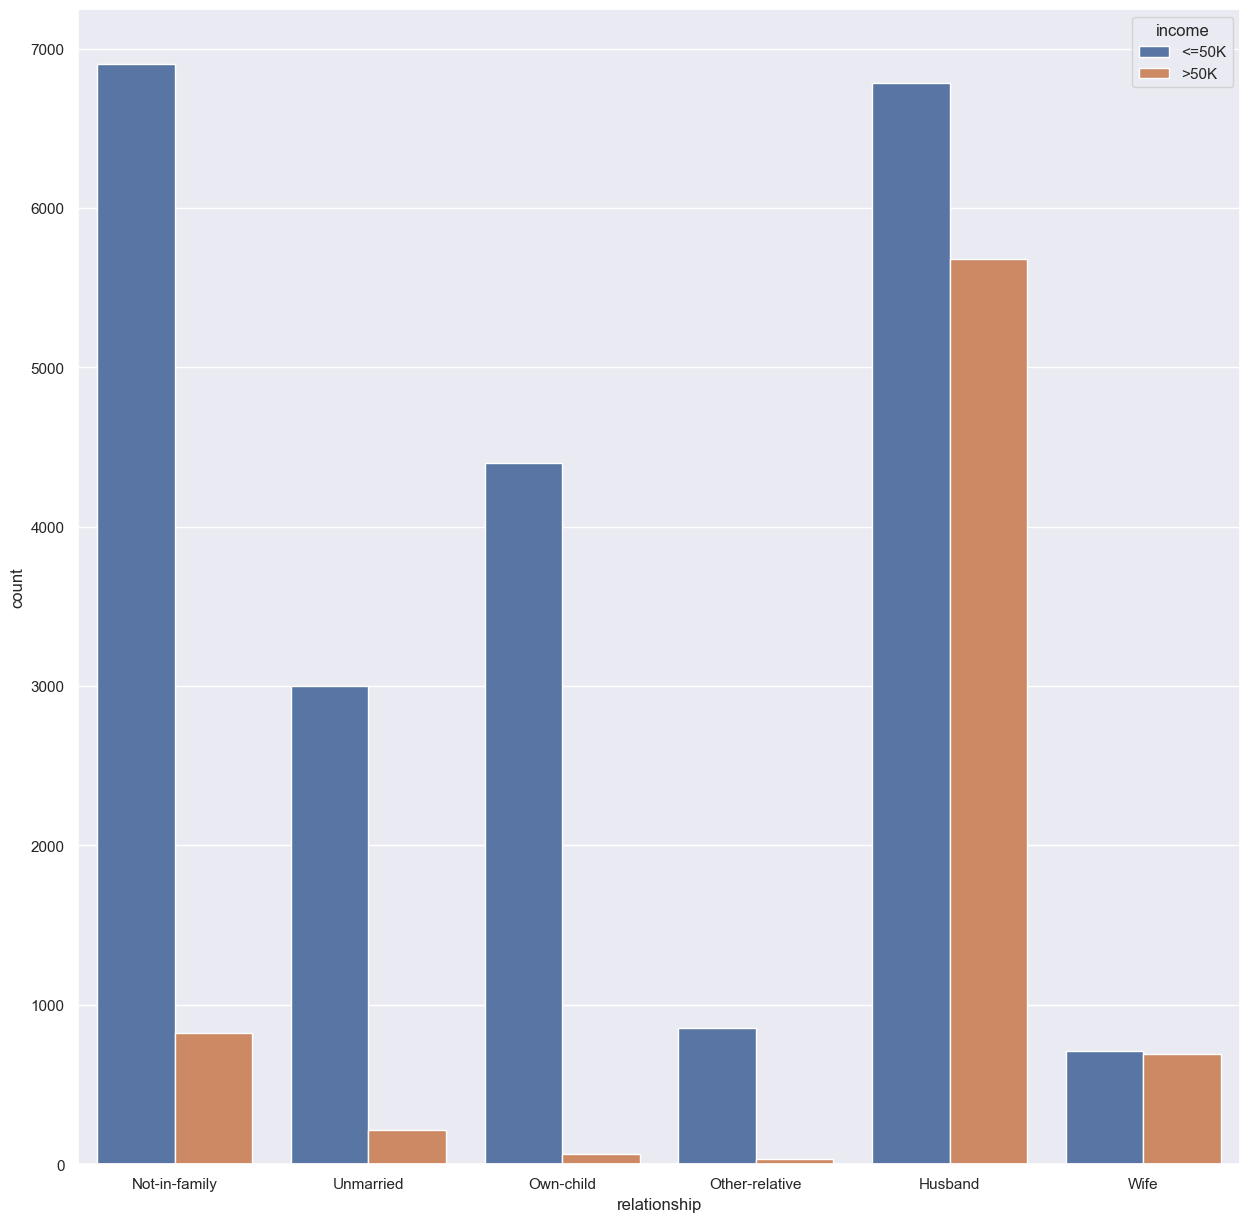

binary_income_over_$50k,0,1
relationship,,
Not-in-family,6903,823
Husband,6784,5679
Own-child,4402,64
Unmarried,2999,213
Other-relative,854,35
Wife,712,694


In [119]:
relationship_countplot_table = plot_countplot(col = 'relationship')
relationship_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

The relationship columns represents the individual's relationship inside the household so it makes sense that the hushband and wife relationship are the one with the most amount of people making > $50k as opposed to the other relationship statuses.

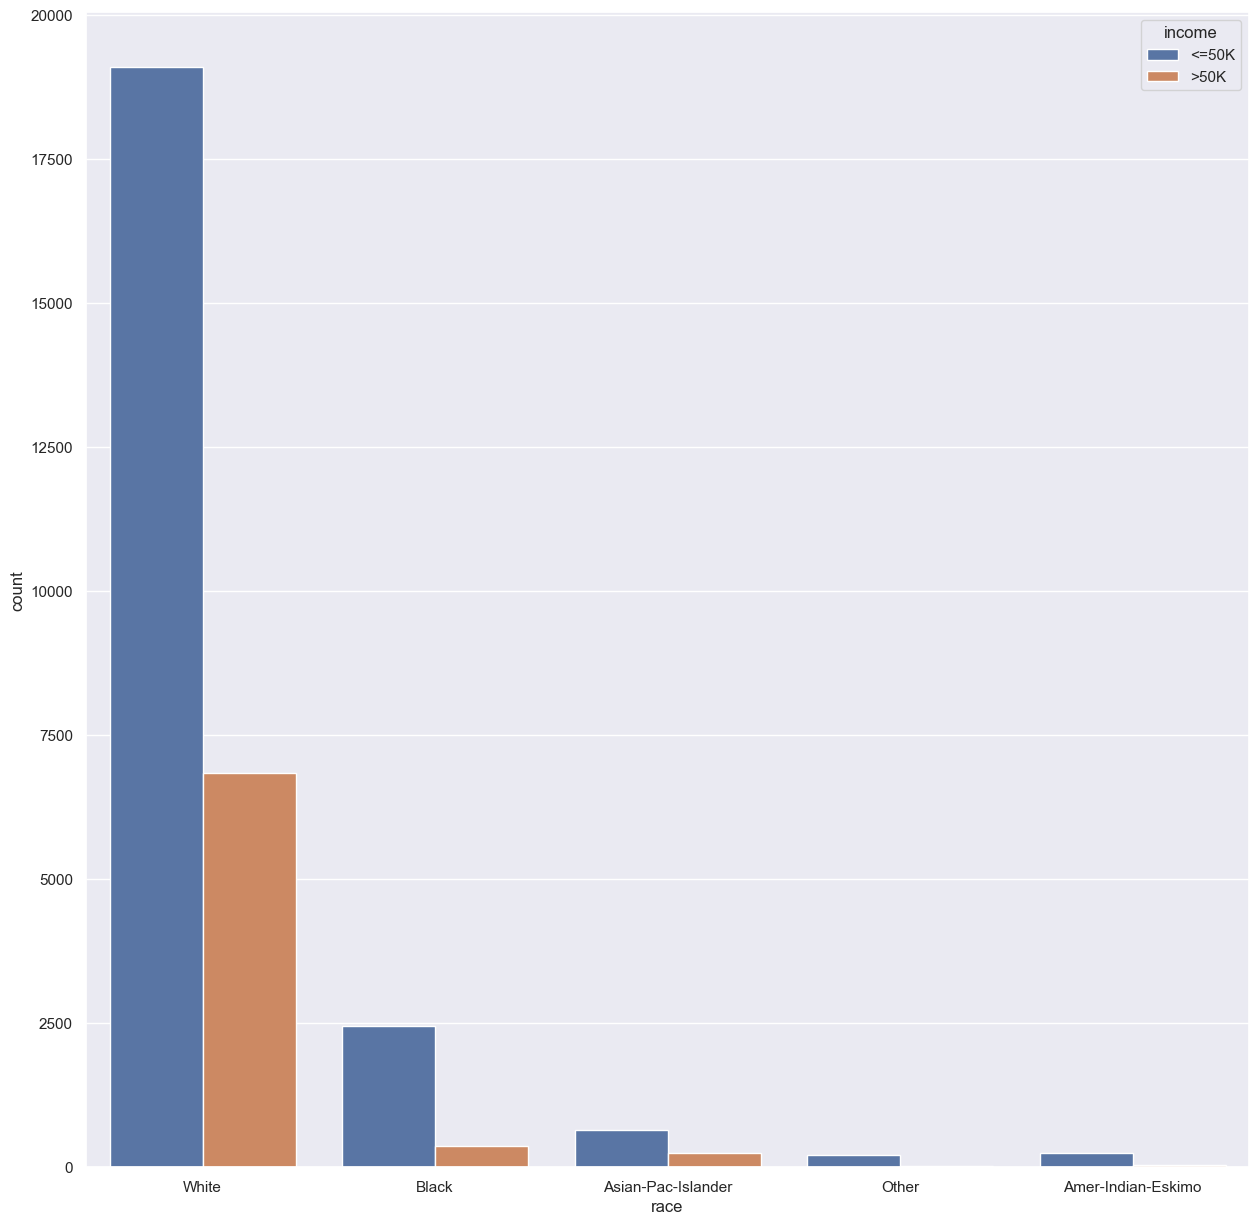

binary_income_over_$50k,0,1
race,,
White,19094,6839
Black,2451,366
Asian-Pac-Islander,647,248
Amer-Indian-Eskimo,252,34
Other,210,21


In [ ]:
race_countplot_table = plot_countplot(col = 'race')
race_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

Analysis question #10 can now be answered. It is clear the race with the most amount of people making > 50k is the white race and it's also the race with the most amount of people making <= $50k. It's worth noting that I am considering only the frequency and not the percentages which would a more fair assesment of which race tends to make more. This answers analysis question #10.

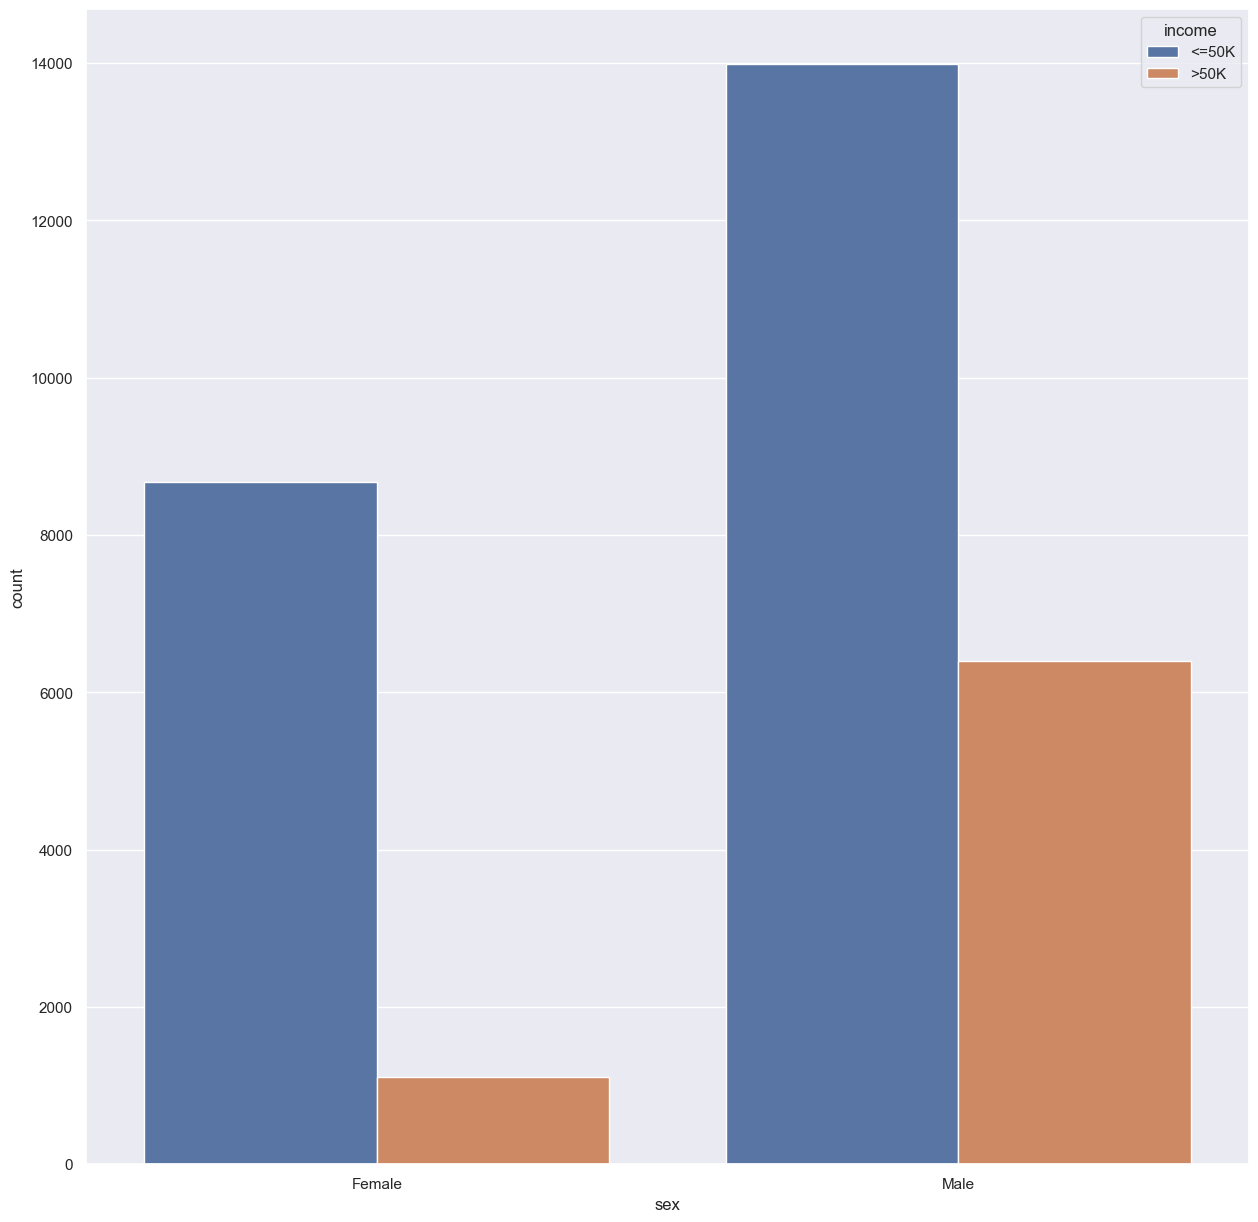

binary_income_over_$50k,0,1
sex,,
Male,13984,6396
Female,8670,1112


In [121]:
sex_countplot_table = plot_countplot(col='sex')
sex_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

The above information shows that the sex with the most amount of people who make > $50k and the most of people who make <= $50k is the male sex. This answers analysis question #8. In both groups there is a considerable amount more people making <= $50k.

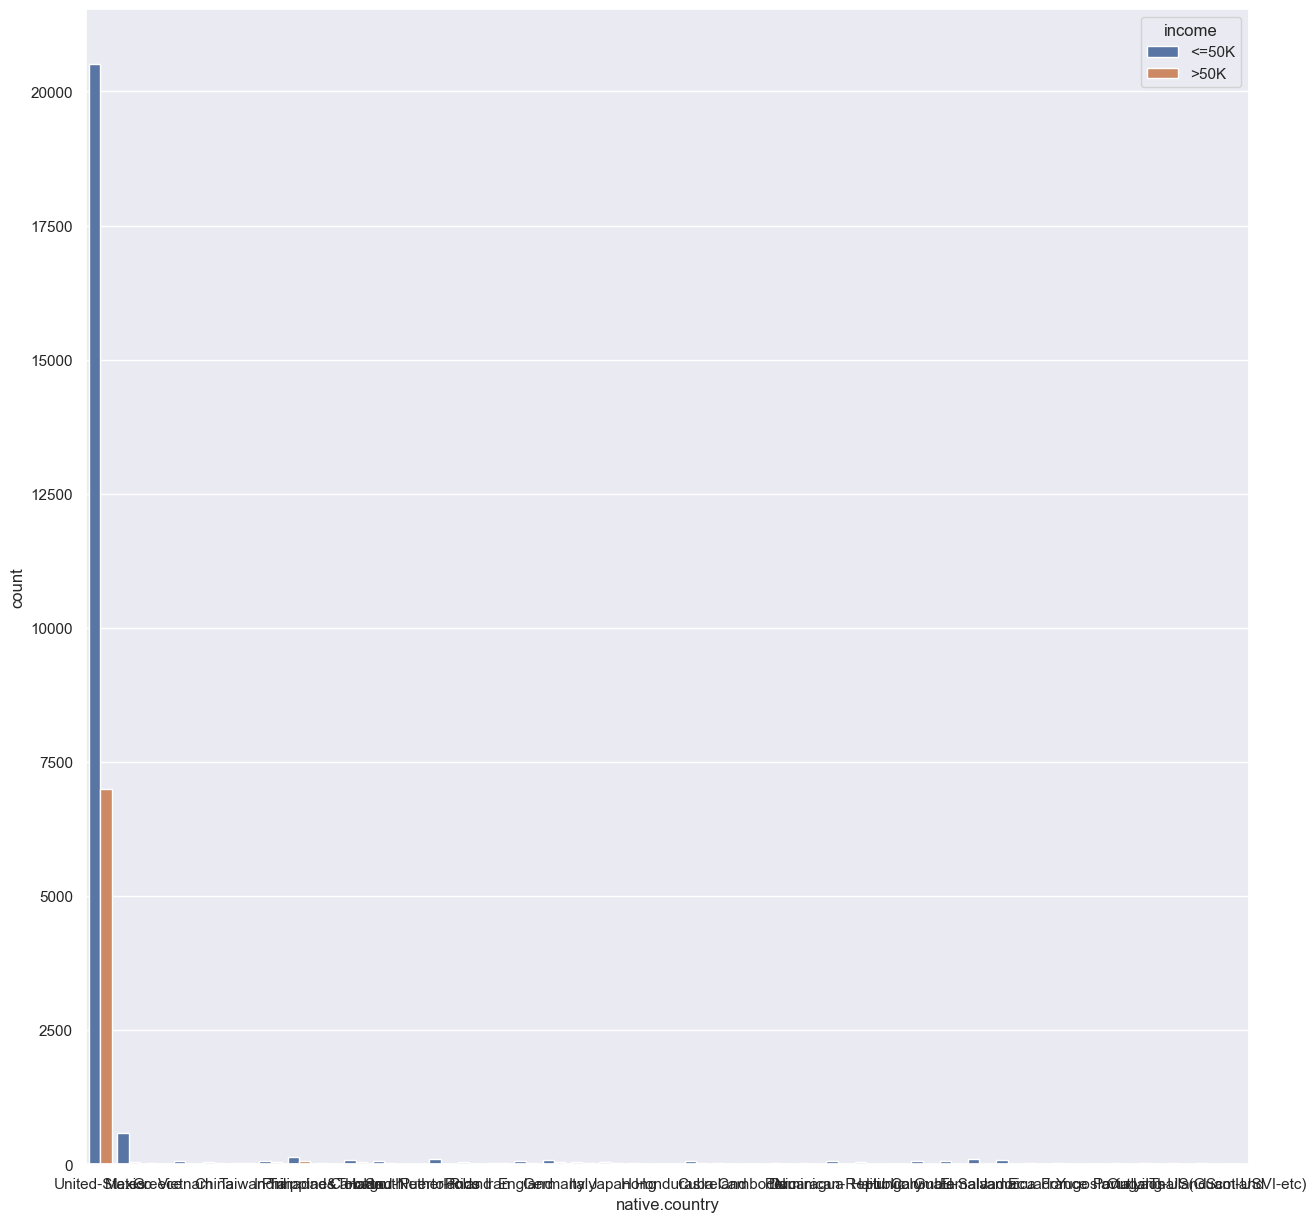

binary_income_over_$50k,0,1
native.country,,
United-States,20509,6995
Mexico,577,33
Philippines,128,60
Puerto-Rico,97,12
El-Salvador,91,9
Germany,84,44
Canada,71,36
Jamaica,70,10
Cuba,67,25


In [122]:
native_country_countplot_table = plot_countplot(col = 'native.country')
native_country_countplot_table.sort_values(by=0, ascending = False) # sort by column 0 and go from largest to smallest

There is too many countries in the dataset to properly show on the countplot but the frequency table showsthat the United States has the most amount of people in both income categories. Mexico has the second most amount of people making <= $50k, followed by the Philippines.


### Pivot Tables for Qualtative Columns

Now I am going to make some pivot tables for the qualtative columns and for each qualtative column we will seperate them into the two income groups and have them summarize the numeric columns by calculating the mean of each numeric column. Although I am going to make one for each qualtative column I'm most intersted into the ones that help answer the remaining analysis questisions, #3 and #9.

In [153]:
workclass_pivot_table = pd.pivot_table(data= adult_census_data, index = ['workclass', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
workclass_pivot_table

age  capital.gain  capital.loss  education.num  \
workclass        income                                                         
Federal-gov      <=50K   40.605536    176.503460     93.015571      10.468858   
                 >50K    45.701370   1870.849315    141.369863      11.706849   
Local-gov        <=50K   40.714678    166.970508     80.163237      10.569959   
                 >50K    44.205255   2414.738916    182.528736      12.154351   
Private          <=50K   35.106720    138.144170     49.671051       9.438369   
                 >50K    42.820139   3528.184988    186.597621      11.416120   
Self-emp-inc     <=50K   43.130802    182.476793     56.662447      10.251055   
                 >50K    48.316667   8467.080000    230.010000      11.891667   
Self-emp-not-inc <=50K   44.451541    223.535014     61.985434       9.680112   
                 >50K    46.411765   6137.133053    249.539216      11.539216   
State-gov        <=50K   37.240642    139.203209     40.529412      10.790374   
                 >50K    45.127907   2165.909884    191.549419      12.869186   
Without-pay      <=50K   47.785714    487.857143      0.000000       9.071429   

                         hours.per.week  
workclass        income                  
Federal-gov      <=50K        39.982699  
                 >50K         43.334247  
Local-gov        <=50K        39.748971  
                 >50K         44.003284  
Private          <=50K        38.782596  
                 >50K         45.493437  
Self-emp-inc     <=50K        46.966245  
                 >50K         50.253333  
Self-emp-not-inc <=50K        43.507003  
                 >50K         46.745098  
State-gov        <=50K        37.170053  
                 >50K         44.174419  
Without-pay      <=50K        32.714286

Through the above pivot table there is a trend that the average age for the > $50k group for every workclass is higher than the average age for the <= $50k group of the same workclass. We can also see this same trend with all the other numeric columns, people in the > $50k group have more capital gain, capital loss, higher education levels, and more hours worked per week than their counterparts in the <= $50k group.

In [132]:
education_pivot_table = pd.pivot_table(data= adult_census_data, index = ['education', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
education_pivot_table

age  capital.gain  capital.loss  education.num  \
education    income                                                         
10th         <=50K   36.980289     97.618922     42.540079            6.0   
             >50K    49.728814   4243.423729    316.728814            6.0   
11th         <=50K   31.731041     80.803842     43.089990            7.0   
             >50K    42.966102   2503.406780    210.915254            7.0   
12th         <=50K   30.899425     89.183908     30.321839            8.0   
             >50K    45.379310   2381.310345     63.724138            8.0   
1st-4th      <=50K   44.317241     65.634483     55.993103            2.0   
             >50K    52.000000   1281.333333      0.000000            2.0   
5th-6th      <=50K   41.554348    105.786232     67.797101            3.0   
             >50K    43.833333   1647.833333    157.250000            3.0   
7th-8th      <=50K   47.260536    185.296935     67.026820            4.0   
             >50K    53.171429   1130.714286     54.342857            4.0   
9th          <=50K   39.793023    130.300000     21.179070            5.0   
             >50K    49.080000   4207.080000    163.160000            5.0   
Assoc-acdm   <=50K   35.902926    114.837766     65.966755           12.0   
             >50K    41.351562   1847.667969    177.835938           12.0   
Assoc-voc    <=50K   36.741433    194.452752     46.686397           11.0   
             >50K    42.459302   2257.125000    136.020349           11.0   
Bachelors    <=50K   35.893763    165.098355     59.048321           13.0   
             >50K    42.412982   3889.806209    198.828786           13.0   
Doctorate    <=50K   44.357895    248.336842     51.884211           16.0   
             >50K    48.071429   6654.185714    337.610714           16.0   
HS-grad      <=50K   37.451417    153.723945     53.116502            9.0   
             >50K    44.690167   2804.876314    160.666048            9.0   
Masters      <=50K   41.895628    293.393512     83.358251           14.0   
             >50K    45.164488   4300.569717    240.202614           14.0   
Preschool    <=50K   41.288889   1018.177778     75.355556            1.0   
Prof-school  <=50K   42.882353    156.375000     95.808824           15.0   
             >50K    44.706897  14274.081281    280.923645           15.0   
Some-college <=50K   34.196181    126.955447     50.589105           10.0   
             >50K    43.889222   2442.908683    157.123503           10.0   

                     hours.per.week  
education    income                  
10th         <=50K        36.988173  
             >50K         43.610169  
11th         <=50K        33.555106  
             >50K         44.898305  
12th         <=50K        34.939655  
             >50K         44.793103  
1st-4th      <=50K        37.944828  
             >50K         48.833333  
5th-6th      <=50K        38.521739  
             >50K         45.166667  
7th-8th      <=50K        39.609195  
             >50K         47.914286  
9th          <=50K        38.413953  
             >50K         44.840000  
Assoc-acdm   <=50K        39.953457  
             >50K         44.800781  
Assoc-voc    <=50K        41.298027  
             >50K         43.790698  
Bachelors    <=50K        40.920493  
             >50K         45.731891  
Doctorate    <=50K        46.694737  
             >50K         48.217857  
HS-grad      <=50K        40.222303  
             >50K         45.210884  
Masters      <=50K        41.703808  
             >50K         46.200436  
Preschool    <=50K        36.866667  
Prof-school  <=50K        43.816176  
             >50K         49.352217  
Some-college <=50K        37.999064  
             >50K         45.056886

The above pivot table helps to answer analysis question #2. For a person who's highest education level, the average age for people of the education level that make > $50k is 45 years old if we round up to the nearest whole number. Another pattern in this pivot table is that for the higher education levels past Some-college the difference in the average age between the income groups is a lot smaller. The Doctorate level has a mean age of 44 years old for the <= $50k group and a mean age of 48 years old for the > $50k group. The Some-college group has a mean age of 34 years old for it's <= $50k group and a mean age of 44 years old for it's > $50k group

In [12]:
marital_status_pivot_table = pd.pivot_table(data= adult_census_data, index = ['marital.status', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
marital_status_pivot_table


age  capital.gain  capital.loss  \
marital.status        income                                          
Divorced              <=50K   42.566986    142.161350     57.413610   
                      >50K    45.435841   5838.396018    141.207965   
Married-AF-spouse     <=50K   30.090909      0.000000      0.000000   
                      >50K    31.300000    729.800000      0.000000   
Married-civ-spouse    <=50K   41.636968    219.403861     61.375815   
                      >50K    44.127989   3605.772152    198.067042   
Married-spouse-absent <=50K   39.631268    113.784661     42.628319   
                      >50K    47.645161   6600.580645    130.193548   
Never-married         <=50K   27.974395     98.092589     45.740169   
                      >50K    38.053191   6011.123404    179.006383   
Separated             <=50K   39.174112    117.262314     48.349370   
                      >50K    42.348485   6614.727273    232.621212   
Widowed               <=50K   57.693440    143.764391     59.281124   
                      >50K    58.287500   4726.162500    248.762500   

                              education.num  hours.per.week  
marital.status        income                                 
Divorced              <=50K        9.852472       40.808612  
                      >50K        11.918142       47.460177  
Married-AF-spouse     <=50K        9.363636       45.727273  
                      >50K        11.000000       42.600000  
Married-civ-spouse    <=50K        9.360031       42.326768  
                      >50K        11.517425       45.558681  
Married-spouse-absent <=50K        8.932153       39.368732  
                      >50K        12.032258       45.225806  
Never-married         <=50K        9.881698       36.756590  
                      >50K        12.534043       46.674468  
Separated             <=50K        9.174112       39.217640  
                      >50K        12.166667       46.212121  
Widowed               <=50K        8.987952       33.599732  
                      >50K        10.962500       42.100000

A trend that's seen in the above pivot table is that for the marital status groups that have at one point been married or are still currently married differ by a small amount of years in their mean age for the income groups except for the Married-spouse-absent. The <= $50k group of the Married-spouse-absent marital status has a mean age of 40 years old whereas the > $50k group has a mean age of 48 years old

In [133]:
occupation_pivot_table = pd.pivot_table(data= adult_census_data, index = ['occupation', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
occupation_pivot_table

age  capital.gain  capital.loss  \
occupation        income                                          
Adm-clerical      <=50K   36.031958    138.317096     50.753025   
                  >50K    43.299197   2819.082329    119.753012   
Armed-Forces      <=50K   28.250000      0.000000      0.000000   
                  >50K    46.000000      0.000000   1887.000000   
Craft-repair      <=50K   37.592569    148.671685     67.058616   
                  >50K    43.735683   2407.403084    153.394273   
Exec-managerial   <=50K   39.628224    184.769830     59.030170   
                  >50K    44.893650   4307.764068    224.303562   
Farming-fishing   <=50K   40.487414    266.659039     43.516018   
                  >50K    47.060870   3070.678261    214.469565   
Handlers-cleaners <=50K   31.385951    112.342541     36.377269   
                  >50K    43.240964   2483.746988    163.939759   
Machine-op-inspct <=50K   37.038350    155.248693     45.747240   
                  >50K    42.297959   1507.987755    148.293878   
Other-service     <=50K   34.628896     78.926948     32.992857   
                  >50K    41.371212   2579.871212    127.439394   
Priv-house-serv   <=50K   42.000000    115.929577     22.507042   
                  >50K    47.000000  25236.000000      0.000000   
Prof-specialty    <=50K   37.911540    193.944320     66.916031   
                  >50K    43.600221   5821.582551    221.925456   
Protective-serv   <=50K   37.688940    247.887097     46.822581   
                  >50K    41.480952   1676.061905    145.323810   
Sales             <=50K   34.802984    135.007651     62.429610   
                  >50K    44.358763   4471.389691    198.073196   
Tech-support      <=50K   34.399054    194.793375     54.121451   
                  >50K    43.140288   1747.528777    199.089928   
Transport-moving  <=50K   39.166800    131.960096     65.486832   
                  >50K    44.517241   1936.366771    150.689655   

                          education.num  hours.per.week  
occupation        income                                 
Adm-clerical      <=50K       10.013962       37.054918  
                  >50K        10.716867       40.839357  
Armed-Forces      <=50K        9.625000       40.750000  
                  >50K        14.000000       40.000000  
Craft-repair      <=50K        8.914478       41.612108  
                  >50K         9.817181       44.656388  
Exec-managerial   <=50K       10.825304       42.760097  
                  >50K        12.089830       47.308209  
Farming-fishing   <=50K        8.431350       46.041190  
                  >50K        10.008696       54.208696  
Handlers-cleaners <=50K        8.444357       37.581689  
                  >50K         9.277108       42.349398  
Machine-op-inspct <=50K        8.350959       40.336432  
                  >50K         9.351020       43.310204  
Other-service     <=50K        8.720455       34.250000  
                  >50K        10.136364       42.901515  
Priv-house-serv   <=50K        7.183099       32.781690  
                  >50K        13.000000       35.000000  
Prof-specialty    <=50K       12.365963       40.071846  
                  >50K        13.536720       45.207068  
Protective-serv   <=50K        9.845622       41.525346  
                  >50K        10.900000       45.576190  
Sales             <=50K        9.902448       38.276970  
                  >50K        11.364948       47.463918  
Tech-support      <=50K       10.839117       38.597792  
                  >50K        11.258993       41.471223  
Transport-moving  <=50K        8.636073       43.619314  
                  >50K         9.206897       48.699060

An intersting thing to to note from the above pivot table is that none of the income groups for Armed-Forces have any capital gain and the amount of hours per week are almost the same.

In [134]:
relationship_pivot_table = pd.pivot_table(data= adult_census_data, index = ['relationship', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
relationship_pivot_table

age  capital.gain  capital.loss  education.num  \
relationship   income                                                         
Husband        <=50K   42.131191    206.296285     62.477889       9.355248   
               >50K    44.561719   3691.779010    200.874274      11.527558   
Not-in-family  <=50K   37.327973    138.764305     65.160220      10.144865   
               >50K    42.701094   5940.450790    164.340219      12.262454   
Other-relative <=50K   32.853630    129.375878     40.624122       8.679157   
               >50K    42.000000   2804.428571    398.428571      10.800000   
Own-child      <=50K   25.028169     75.630622     37.754884       9.504998   
               >50K    36.046875   6102.859375    129.859375      11.156250   
Unmarried      <=50K   39.948983    123.621874     32.652884       9.528843   
               >50K    45.779343   5411.131455    150.173709      11.868545   
Wife           <=50K   39.028090    282.980337     53.853933       9.567416   
               >50K    40.789625   2980.096542    179.279539      11.475504   

                       hours.per.week  
relationship   income                  
Husband        <=50K        43.003096  
               >50K         46.434407  
Not-in-family  <=50K        40.380559  
               >50K         46.972053  
Other-relative <=50K        37.135831  
               >50K         42.828571  
Own-child      <=50K        33.208996  
               >50K         43.281250  
Unmarried      <=50K        38.950984  
               >50K         46.201878  
Wife           <=50K        36.810393  
               >50K         38.466859

For all of the relationship groups, the > $50k group has made a higher average capital gain amount.

In [136]:
race_pivot_table = pd.pivot_table(data= adult_census_data, index = ['race', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
race_pivot_table

age  capital.gain  capital.loss  \
race               income                                          
Amer-Indian-Eskimo <=50K   36.376984    203.535714     22.234127   
                   >50K    39.411765   4045.647059    147.823529   
Asian-Pac-Islander <=50K   36.151468    118.278207     48.755796   
                   >50K    42.500000   4398.750000    203.677419   
Black              <=50K   36.989392    107.908201     40.806610   
                   >50K    43.696721   3931.745902    159.806011   
Other              <=50K   32.780952     81.719048     46.338095   
                   >50K    41.809524  10850.000000     89.857143   
White              <=50K   36.619723    155.210014     55.719860   
                   >50K    44.055271   3899.515865    195.754642   

                           education.num  hours.per.week  
race               income                                 
Amer-Indian-Eskimo <=50K        9.123016       39.781746  
                   >50K        11.088235       45.205882  
Asian-Pac-Islander <=50K       10.496136       38.925811  
                   >50K        12.407258       44.608871  
Black              <=50K        9.306814       37.798450  
                   >50K        11.030055       44.540984  
Other              <=50K        8.400000       39.633333  
                   >50K        11.523810       44.904762  
White              <=50K        9.661307       39.553053  
                   >50K        11.611054       45.813715

The race with the highest mean age for the > $50k group which despite it having the most amount of people who are making > $50k. The races with fewer representation in the dataset have younger mean ages for their > $50k group. 

In [ ]:
sex_pivot_table = pd.pivot_table(data= adult_census_data, index = ['sex', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
sex_pivot_table

age  capital.gain  capital.loss  education.num  \
sex    income                                                         
Female <=50K   36.231719    119.394348     46.251557       9.878777   
       >50K    41.964928   4084.820144    175.451439      11.812950   
Male   <=50K   36.841390    167.183352     57.909754       9.474328   
       >50K    44.305816   3912.098186    196.932145      11.570513   

               hours.per.week  
sex    income                  
Female <=50K        36.423645  
       >50K         40.897482  
Male   <=50K        41.162042  
       >50K         46.542683

The above pivot table allows me to answer analysis question #4. For males who make > $50k, the average is 44, rounding to the nearest whole number. For females who make > $50k, the average age is 42, rounding the to the nearest whole number. On a side note, both males and females in the <= $50k group have the same average age of 36 without rounding, which is opposite of what we see with > $50k group of females and males.

In [152]:
native_country_pivot_table = pd.pivot_table(data= adult_census_data, index = ['native.country', 'income'], values= ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])  
native_country_pivot_table

age  capital.gain  capital.loss  education.num  \
native.country income                                                         
Cambodia       <=50K   37.272727    543.545455    170.545455       7.727273   
               >50K    41.428571   1935.714286      0.000000      10.285714   
Canada         <=50K   40.098592     70.605634    168.070423      10.239437   
               >50K    44.305556   4659.583333    105.250000      11.527778   
China          <=50K   41.270833    119.041667    108.187500      10.354167   
...                          ...           ...           ...            ...   
United-States  >50K    44.000429   3965.694353    194.689207      11.586276   
Vietnam        <=50K   33.203390    252.406780     99.135593       9.508475   
               >50K    35.400000   5873.600000      0.000000       9.600000   
Yugoslavia     <=50K   38.000000      0.000000      0.000000       9.700000   
               >50K    40.166667    926.000000      0.000000      10.333333   

                       hours.per.week  
native.country income                  
Cambodia       <=50K        41.545455  
               >50K         40.000000  
Canada         <=50K        38.704225  
               >50K         46.944444  
China          <=50K        38.541667  
...                               ...  
United-States  >50K         45.750536  
Vietnam        <=50K        38.152542  
               >50K         39.200000  
Yugoslavia     <=50K        41.600000  
               >50K         49.500000  

[80 rows x 5 columns]

Thailand's > $50k group has the highest average hours worked per week with 58 hours per week!

# Testing Hypothesis
Now that we have answered our analysis questions let's do some hypothesis test for some of the observations we had for the questions to see if they are statistcally significant and not by chance

Our first hypothesis test will be, helping to confirm whether or not our observation for analysis question #1 is not by chance.

Let: 

  $\mu_0$: means hour per week for the > $50k group

  $\mu_1$: mean hours per week for the <= $50k group

Null Hypothesis: Both groups have the same average amount of hours worked per week, $\mu_0 = \mu_1$

Alternate Hypothesis: The groups don't have the same average amount of hours worked per week, $\mu_0 \neq \mu_1$

For this we will use a Two Sample Student T Test:
- Test whether two independent samples are significantly different
- Assumptions: 
  - Observations in each sample are independent and identically distributed (iid).
  - Observations in each sample are normally distributed.
  - Observations in each sample have the same variance.


In [145]:
from scipy.stats import ttest_ind
less_than_equal_to_50k_group = adult_census_data[adult_census_data["binary_income_over_$50k"] == 0]["hours.per.week"]
greater_than_50k_group  = adult_census_data[adult_census_data["binary_income_over_$50k"] == 1]["hours.per.week"]
stat, p = ttest_ind(less_than_equal_to_50k_group, greater_than_50k_group)
if p > 0.05:
  print("Fail to reject null hypothesis")
else:
  print("Reject null hypothesis, there is evidence that the groups don't have the same average amount of hours worked per week")


Reject null hypothesis, there is evidence that the groups don't have the same average amount of hours worked per week


We were able to reject the null hypothesis, meaning that the differnce in the average hours worked per week for the two income groups is statistically significant. Our observation of the two groups having different means for the hours worked per week is likely to not be by chance. 

Our second hypothesis test will be for analysis question #9 is not by chance.

Let: 

  $\mu_0$: mean age for males apart of the > $50k group

  $\mu_1$: mean age for females apart of the > $50k group

Null Hypothesis: Both groups are the same age, $\mu_0 = \mu_1$

Alternate Hypothesis: The groups don't share the same age, $\mu_0 \neq \mu_1$

For this we will use a Two Sample Student T Test:
- Test whether two independent samples are significantly different
- Assumptions: 
  - Observations in each sample are independent and identically distributed (iid).
  - Observations in each sample are normally distributed.
  - Observations in each sample have the same variance.

In [ ]:
female_group = adult_census_data[(adult_census_data['binary_income_over_$50k'] == 1) & (adult_census_data['sex'] == 'Female')]['age']
male_group  = adult_census_data[(adult_census_data['binary_income_over_$50k'] == 1) & (adult_census_data['sex'] == 'Male')]['age']
stat, p = ttest_ind(female_group, male_group)
if p > 0.05:
  print("Fail to reject null hypothesis")
else:
  print("Reject null hypothesis, there is evidence that the groups don't share the same mean age")

Reject null hypothesis, there is evidence that the groups don't have the same average amount of hours worked per week


We were able to reject the null hypothesis. This means that our observation for analysis question #9 is inline with the hypothesis test since we found that the average age for women apart of the > $50k group was different than the average age of males apart of the > $50k group.